In [1]:
import pandas as pd
import pyfolio as pf
import pandas_datareader.data as web
from zipline import run_algorithm
from zipline.api import order, order_target, record, symbol, set_slippage, set_commission
from zipline.finance import execution, slippage, commission

In [2]:
# from zipline.finance.slippage import SlippageModel

# Custom slippage model
class InstantSlippage(slippage.SlippageModel):
    
    def process_order(self, data, order):
        # Use price from previous bar
        price = data.history(
            assets=order.sid,
            fields='price',
            bar_count=2,
            frequency='1d'
        )[0]
        
        # Alternative: Use current bar's open, instead of close
        # price = data.current(order.sid, 'open')

        return (price, order.amount)

In [3]:
def initialize(context):
    set_slippage(
#         us_equities=slippage.FixedSlippage(spread=0.00),
        us_equities=InstantSlippage(),
        us_futures=None
    )
    set_commission(
        us_equities=commission.PerShare(cost=0.00, min_trade_cost=0.0),
        us_futures=None
    )


def handle_data(context, data):
    symbol_str = 'IBM'
#     order(asset=symbol(symbol_str=symbol_str), amount=1)
    order_target(
        asset=symbol(symbol_str=symbol_str),
        target=1,
    )
    record(
        **{
            symbol_str: data.current(
                assets=symbol(symbol_str=symbol_str),
                fields='price'
            )
        }
    )

In [4]:
start = pd.Timestamp('2014-01-05')
end = pd.Timestamp('2018-02-28')

sp500 = web.DataReader('SP500', 'fred', start, end).SP500
benchmark_returns = sp500.pct_change()

In [5]:
result = run_algorithm(
    start=start.tz_localize('UTC'),
    end=end.tz_localize('UTC'),
    initialize=initialize,
    capital_base=10000,
    handle_data=handle_data,
    before_trading_start=None,
#     trading_calendar=TFSExchangeCalendar(),
#     benchmark_returns=benchmark_returns,
    bundle='quandl',
    data_frequency='daily'
)
result.head()

/home/oga/.local/lib/python3.8/site-packages/empyrical/stats.py:797: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


,period_open,period_close,long_value,transactions,starting_exposure,short_value,pnl,capital_used,ending_exposure,starting_value,...,sharpe,sortino,algorithm_period_return,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label,algo_volatility
2014-01-06 21:00:00+00:00,2014-01-06 14:31:00+00:00,2014-01-06 21:00:00+00:00,0.00,[],0.00,0.0,0.00,0.0,0.00,0.00,...,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.0,1,2014-01,NaN
2014-01-07 21:00:00+00:00,2014-01-07 14:31:00+00:00,2014-01-07 21:00:00+00:00,189.71,"[{'amount': 1, 'dt': 2014-01-07 21:00:00+00:00...",0.00,0.0,3.71,-186.0,189.71,0.00,...,11.224972,NaN,0.000371,0.000000,0.018964,0.0,0.0,2,2014-01,0.004164
2014-01-08 21:00:00+00:00,2014-01-08 14:31:00+00:00,2014-01-08 21:00:00+00:00,187.97,[],189.71,0.0,-1.74,0.0,187.97,189.71,...,3.746339,10.383887,0.000197,-0.000174,0.018964,0.0,0.0,3,2014-01,0.004419
2014-01-09 21:00:00+00:00,2014-01-09 14:31:00+00:00,2014-01-09 21:00:00+00:00,187.38,[],187.97,0.0,-0.59,0.0,187.38,187.97,...,2.325261,5.967059,0.000138,-0.000233,0.018964,0.0,0.0,4,2014-01,0.003741
2014-01-10 21:00:00+00:00,2014-01-10 14:31:00+00:00,2014-01-10 21:00:00+00:00,187.26,[],187.38,0.0,-0.12,0.0,187.26,187.38,...,1.951221,4.862959,0.000126,-0.000245,0.018964,0.0,0.0,5,2014-01,0.003257


In [6]:
df = result

In [7]:
df.columns

Index(['period_open', 'period_close', 'long_value', 'transactions',
       'starting_exposure', 'short_value', 'pnl', 'capital_used',
       'ending_exposure', 'starting_value', 'long_exposure', 'orders',
       'short_exposure', 'positions', 'gross_leverage', 'ending_value',
       'net_leverage', 'starting_cash', 'portfolio_value', 'longs_count',
       'ending_cash', 'returns', 'shorts_count', 'IBM',
       'benchmark_period_return', 'benchmark_volatility', 'alpha', 'beta',
       'sharpe', 'sortino', 'algorithm_period_return', 'max_drawdown',
       'max_leverage', 'excess_return', 'treasury_period_return',
       'trading_days', 'period_label', 'algo_volatility'],
      dtype='object')

In [8]:
df[["IBM", "capital_used", "ending_cash", "ending_value", "portfolio_value", "algorithm_period_return", "returns"]]

,IBM,capital_used,ending_cash,ending_value,portfolio_value,algorithm_period_return,returns
2014-01-06 21:00:00+00:00,186.00,0.0,10000.0,0.00,10000.00,0.000000,0.000000
2014-01-07 21:00:00+00:00,189.71,-186.0,9814.0,189.71,10003.71,0.000371,0.000371
2014-01-08 21:00:00+00:00,187.97,0.0,9814.0,187.97,10001.97,0.000197,-0.000174
2014-01-09 21:00:00+00:00,187.38,0.0,9814.0,187.38,10001.38,0.000138,-0.000059
2014-01-10 21:00:00+00:00,187.26,0.0,9814.0,187.26,10001.26,0.000126,-0.000012
...,...,...,...,...,...,...,...
2018-02-22 21:00:00+00:00,153.18,0.0,9814.0,153.18,9967.18,-0.003282,-0.000078
2018-02-23 21:00:00+00:00,155.52,0.0,9814.0,155.52,9969.52,-0.003048,0.000235
2018-02-26 21:00:00+00:00,158.58,0.0,9814.0,158.58,9972.58,-0.002742,0.000307
2018-02-27 21:00:00+00:00,156.55,0.0,9814.0,156.55,9970.55,-0.002945,-0.000204


In [9]:
df[["IBM", "ending_exposure"]]

,IBM,ending_exposure
2014-01-06 21:00:00+00:00,186.00,0.00
2014-01-07 21:00:00+00:00,189.71,189.71
2014-01-08 21:00:00+00:00,187.97,187.97
2014-01-09 21:00:00+00:00,187.38,187.38
2014-01-10 21:00:00+00:00,187.26,187.26
...,...,...
2018-02-22 21:00:00+00:00,153.18,153.18
2018-02-23 21:00:00+00:00,155.52,155.52
2018-02-26 21:00:00+00:00,158.58,158.58
2018-02-27 21:00:00+00:00,156.55,156.55


In [10]:
df["transactions"].iloc[1]

[{'amount': 1,
  'dt': Timestamp('2014-01-07 21:00:00+0000', tz='UTC'),
  'price': 186.0,
  'order_id': '8773bb9781f54d649efa388aed7cb000',
  'sid': Equity(1441 [IBM]),
  'commission': None}]

In [11]:
df["positions"].iloc[1]

[{'sid': Equity(1441 [IBM]),
  'amount': 1,
  'cost_basis': 186.0,
  'last_sale_price': 189.71}]

In [12]:
df["orders"].iloc[0]

[{'id': '8773bb9781f54d649efa388aed7cb000',
  'dt': Timestamp('2014-01-06 21:00:00+0000', tz='UTC'),
  'reason': None,
  'created': Timestamp('2014-01-06 21:00:00+0000', tz='UTC'),
  'amount': 1,
  'filled': 0,
  'commission': 0,
  'stop': None,
  'limit': None,
  'stop_reached': False,
  'limit_reached': False,
  'sid': Equity(1441 [IBM]),
  'status': <ORDER_STATUS.OPEN: 0>}]

In [13]:
df["orders"].iloc[1]

[{'id': '8773bb9781f54d649efa388aed7cb000',
  'dt': Timestamp('2014-01-07 21:00:00+0000', tz='UTC'),
  'reason': None,
  'created': Timestamp('2014-01-06 21:00:00+0000', tz='UTC'),
  'amount': 1,
  'filled': 1,
  'commission': 0,
  'stop': None,
  'limit': None,
  'stop_reached': False,
  'limit_reached': False,
  'sid': Equity(1441 [IBM]),
  'status': <ORDER_STATUS.FILLED: 1>}]

In [14]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(result)

In [15]:
returns

2014-01-06 00:00:00+00:00    0.000000
2014-01-07 00:00:00+00:00    0.000371
2014-01-08 00:00:00+00:00   -0.000174
2014-01-09 00:00:00+00:00   -0.000059
2014-01-10 00:00:00+00:00   -0.000012
                               ...   
2018-02-22 00:00:00+00:00   -0.000078
2018-02-23 00:00:00+00:00    0.000235
2018-02-26 00:00:00+00:00    0.000307
2018-02-27 00:00:00+00:00   -0.000204
2018-02-28 00:00:00+00:00   -0.000072
Name: returns, Length: 1045, dtype: float64

In [16]:
positions

sid,Equity(1441 [IBM]),cash
index,,
2014-01-07 00:00:00+00:00,189.71,9814.0
2014-01-08 00:00:00+00:00,187.97,9814.0
2014-01-09 00:00:00+00:00,187.38,9814.0
2014-01-10 00:00:00+00:00,187.26,9814.0
2014-01-13 00:00:00+00:00,184.16,9814.0
...,...,...
2018-02-22 00:00:00+00:00,153.18,9814.0
2018-02-23 00:00:00+00:00,155.52,9814.0
2018-02-26 00:00:00+00:00,158.58,9814.0


In [17]:
transactions

,sid,symbol,price,order_id,amount,commission,dt,txn_dollars
2014-01-07 21:00:00+00:00,Equity(1441 [IBM]),Equity(1441 [IBM]),186.0,8773bb9781f54d649efa388aed7cb000,1,None,2014-01-07 21:00:00+00:00,-186.0


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.80,2014-04-14,2016-02-11,NaT,NaN
1,0.17,2014-01-17,2014-02-04,2014-03-25,48
2,0.06,2014-01-07,2014-01-13,2014-01-17,9
3,0.05,2014-03-25,2014-03-27,2014-04-09,12
4,0.01,2014-04-09,2014-04-11,2014-04-14,4


/home/oga/.local/lib/python3.8/site-packages/pyfolio/timeseries.py:1258: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
Apr14,0.00%,-0.06%,0.04%
Oct14,-0.01%,-0.13%,0.04%
Fall2015,-0.00%,-0.05%,0.06%
New Normal,-0.00%,-0.13%,0.13%


Top 10 long positions of all time,max
sid,
IBM,1.98%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
IBM,1.98%


/home/oga/.local/lib/python3.8/site-packages/pyfolio/tears.py:925: UserWarning: Fewer than 5 round-trip trades made.
               Skipping round trip tearsheet.
  warnings.warn(


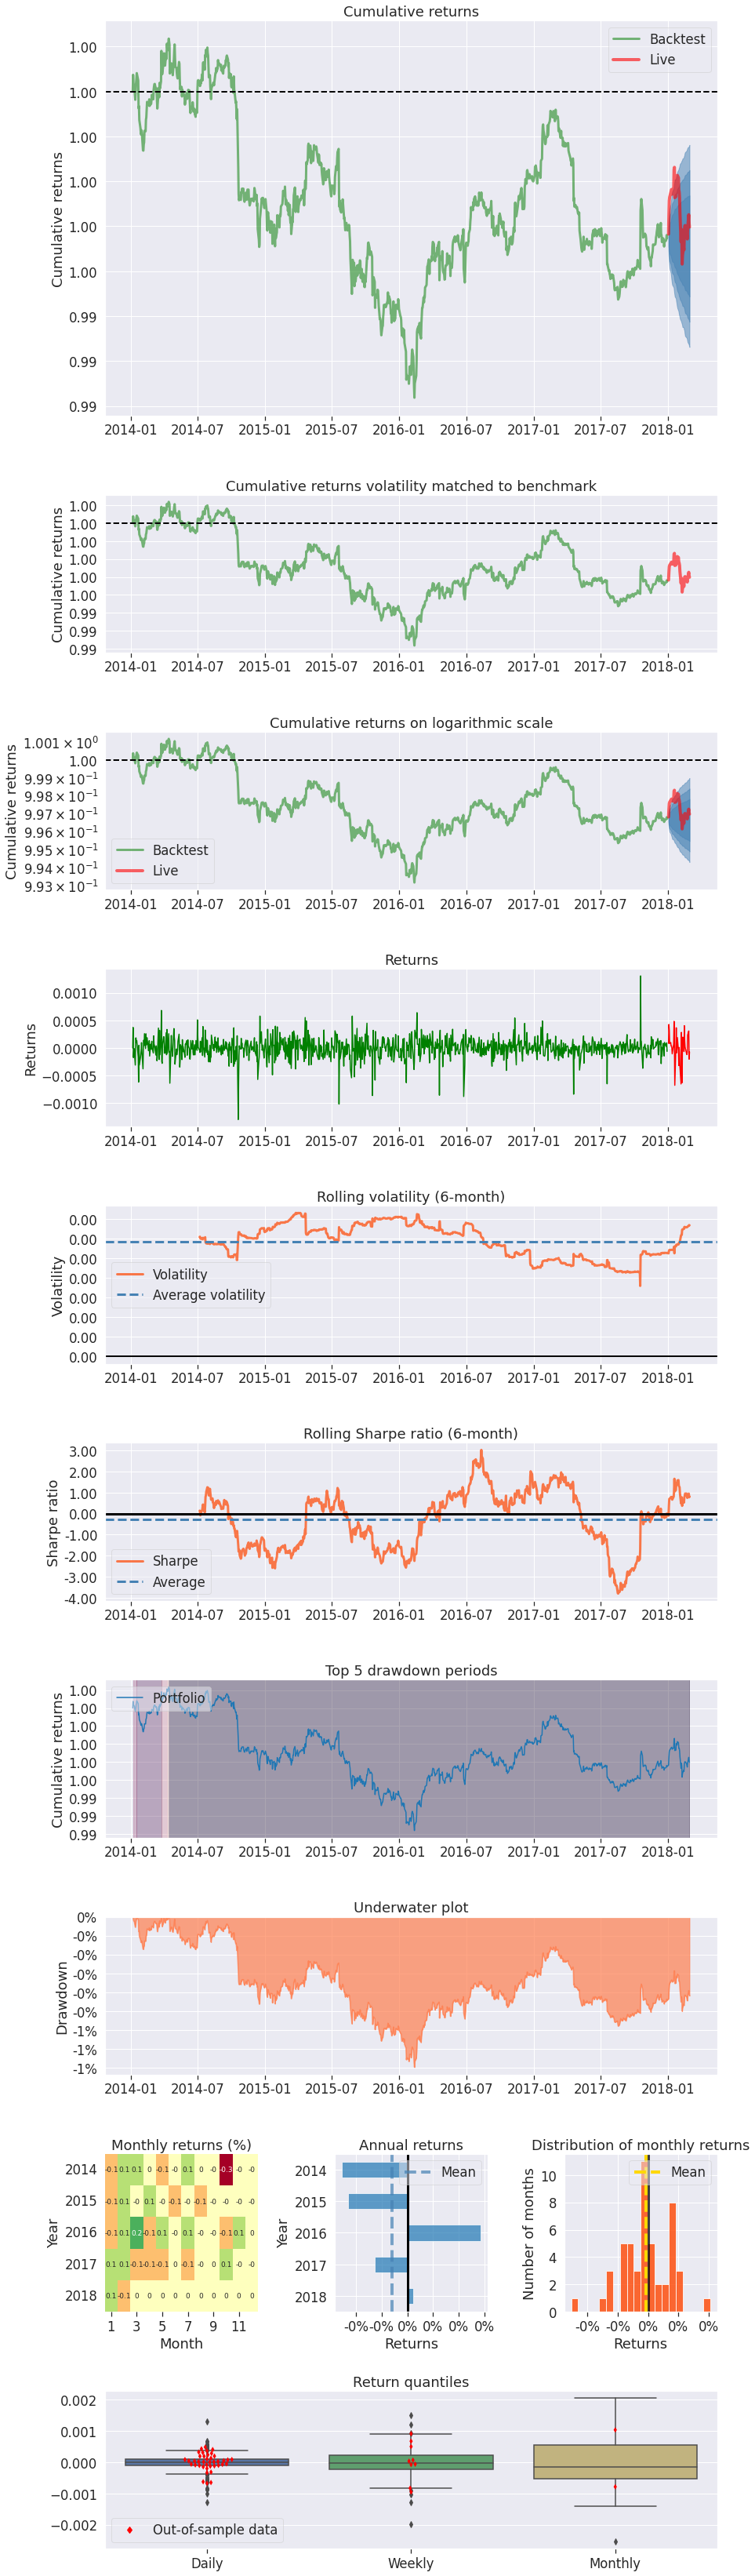

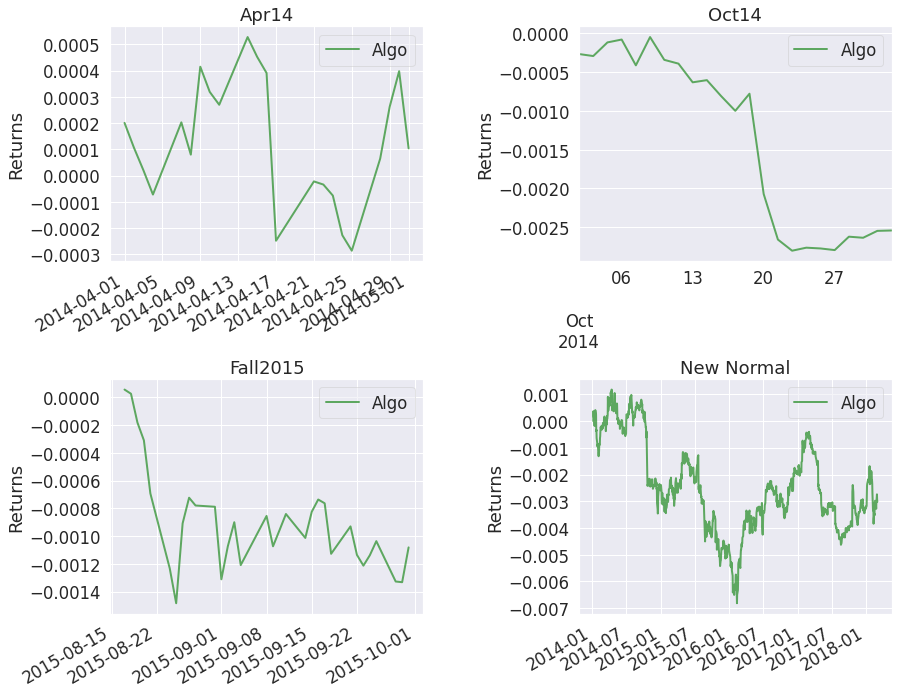

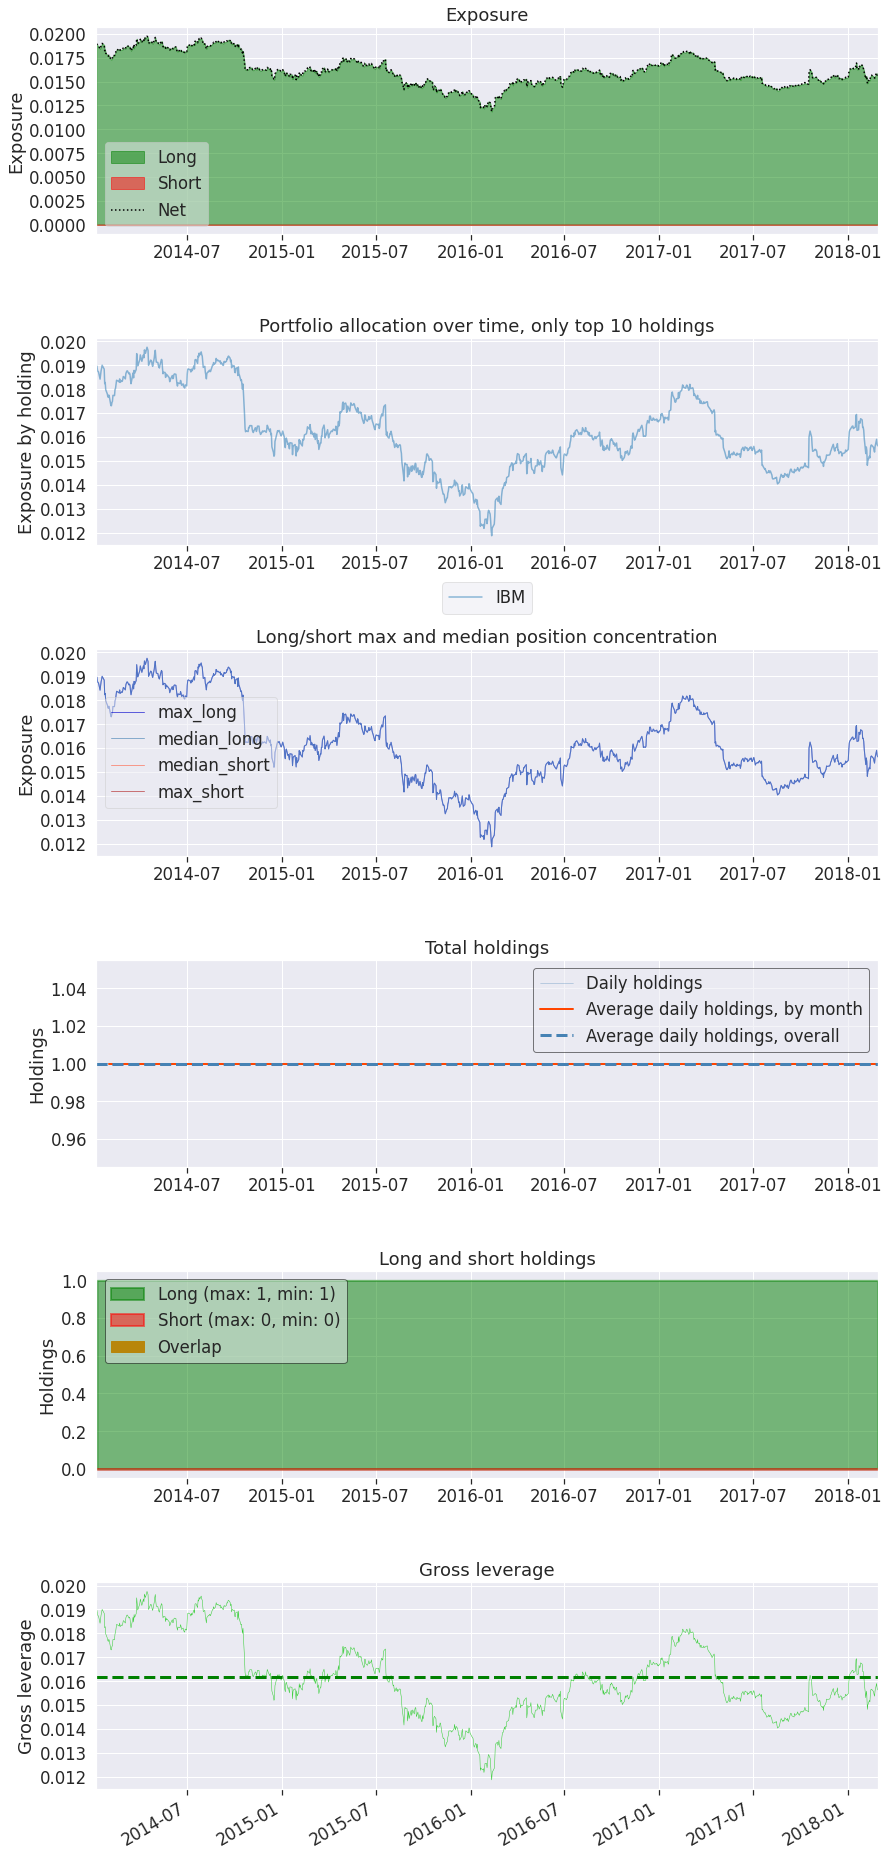

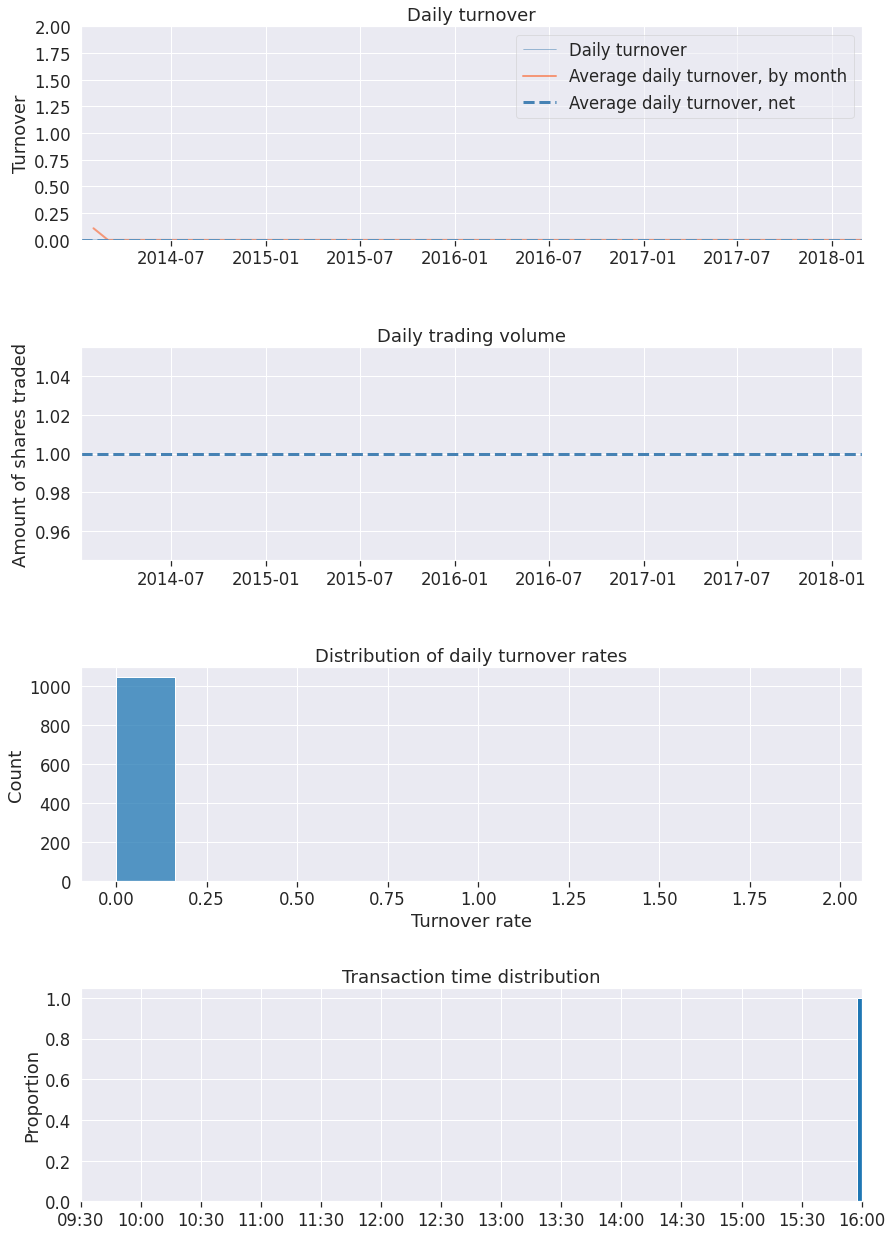

In [18]:
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    live_start_date='2018-01-01',
    round_trips=True
)